In [7]:
#importing dependiences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#importing the dataset
df=pd.read_csv(r'C:\Users\Mohammed Arif\Downloads\car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#understanding the dataset
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
#finding number of uniques types with names
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [21]:
#checking total number of unique cars
a=df.Car_Name.unique()
len(a)

98

In [8]:
#checking distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#encoding fueltype,sellling type,trasmission type
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
#checking the dataset whether it has been encoded
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#splitting data and target
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [18]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [19]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [25]:
#model training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
#loading linear regression model
lr=LinearRegression()

In [26]:
#model fitting
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
#model evaluation
#prediction on training data
trained_data_prediction=lr.predict(x_train)

In [32]:
error_rate=metrics.r2_score(y_train,trained_data_prediction)

In [35]:
#r square error
print('R squared error:',error_rate)

R squared error: 0.8796483009370208


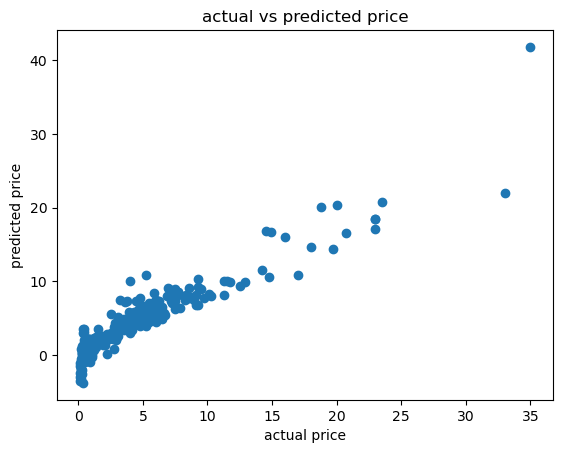

In [36]:
#visualize the actual price and predicted price
plt.scatter(y_train,trained_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()


In [37]:
test_data_prediction=lr.predict(x_test)

In [38]:
error_rate=metrics.r2_score(y_test,test_data_prediction)

In [39]:
print('R squared error:',error_rate)

R squared error: 0.8365861023212434


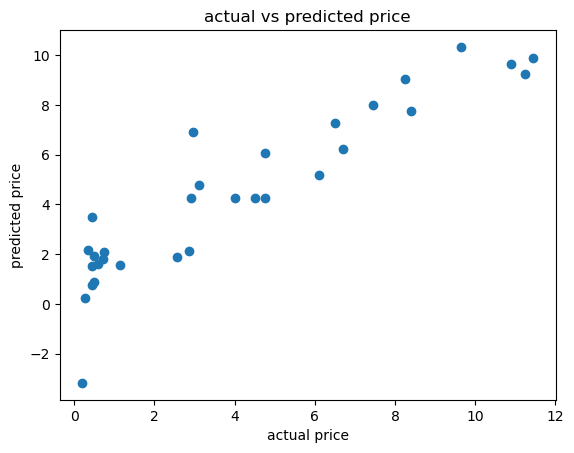

In [40]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()


In [42]:
#lasso regression
ls=Lasso()

In [43]:
#model fitting
ls.fit(x_train,y_train)

Lasso()

In [44]:
#model evaluation
#prediction on training data
trained_data_prediction=ls.predict(x_train)

In [45]:
error_rate=metrics.r2_score(y_train,trained_data_prediction)

In [46]:
#r square error
print('R squared error:',error_rate)

R squared error: 0.842448071824074


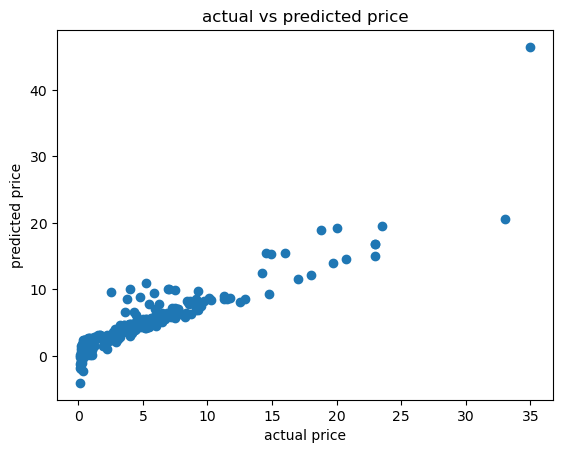

In [47]:
#visualize the actual price and predicted price
plt.scatter(y_train,trained_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()


In [48]:
test_data_prediction=ls.predict(x_test)

In [49]:
error_rate=metrics.r2_score(y_test,test_data_prediction)

In [50]:
print('R squared error:',error_rate)

R squared error: 0.8709763132343395


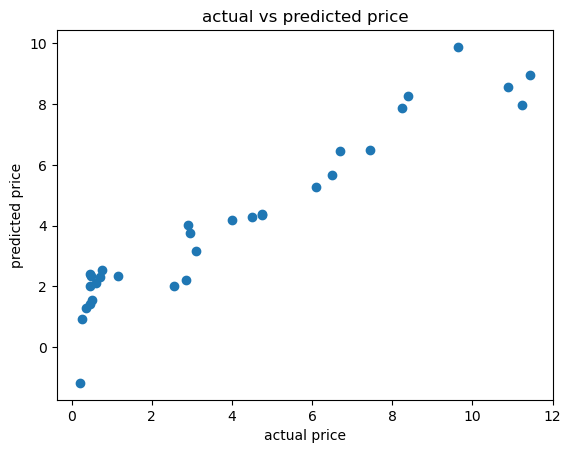

In [51]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()
